In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

# 경고표시 지우기
import warnings
warnings.filterwarnings(action="ignore")

# matplotlib는 한글 폰트가 지원이 안됨. 지원되게하려면.
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name() # 맑은고딕폰트이름

# 폰트를 지정해주는 작업
plt.rc("font", family = font_name)

# 한글 폰트때문에 깨져보이는 -를 다시 보일 수 있게 해주는 작업
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

In [72]:
df = pd.read_csv("./data/final_data/2018-2019 서울,인천,경기 교통사고 및 강수량 데이터2.csv",
                encoding = "utf-8", index_col = 0)

df

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수
0,2018-01-01,0.00,0.00,서울,61,7,32,100,67,1
1,2018-01-02,0.00,0.00,서울,58,4,29,91,78,0
2,2018-01-03,0.00,0.00,서울,59,11,28,98,72,2
3,2018-01-04,0.00,0.00,서울,65,4,27,96,81,3
4,2018-01-05,0.00,0.00,서울,82,16,35,133,94,1
...,...,...,...,...,...,...,...,...,...,...
21165,2019-12-27,0.00,0.00,인천,17,2,6,25,22,0
21166,2019-12-28,0.03,0.03,인천,25,4,6,35,24,0
21167,2019-12-29,1.00,0.58,인천,13,1,4,18,15,0
21168,2019-12-30,0.18,0.24,인천,17,2,5,24,20,0


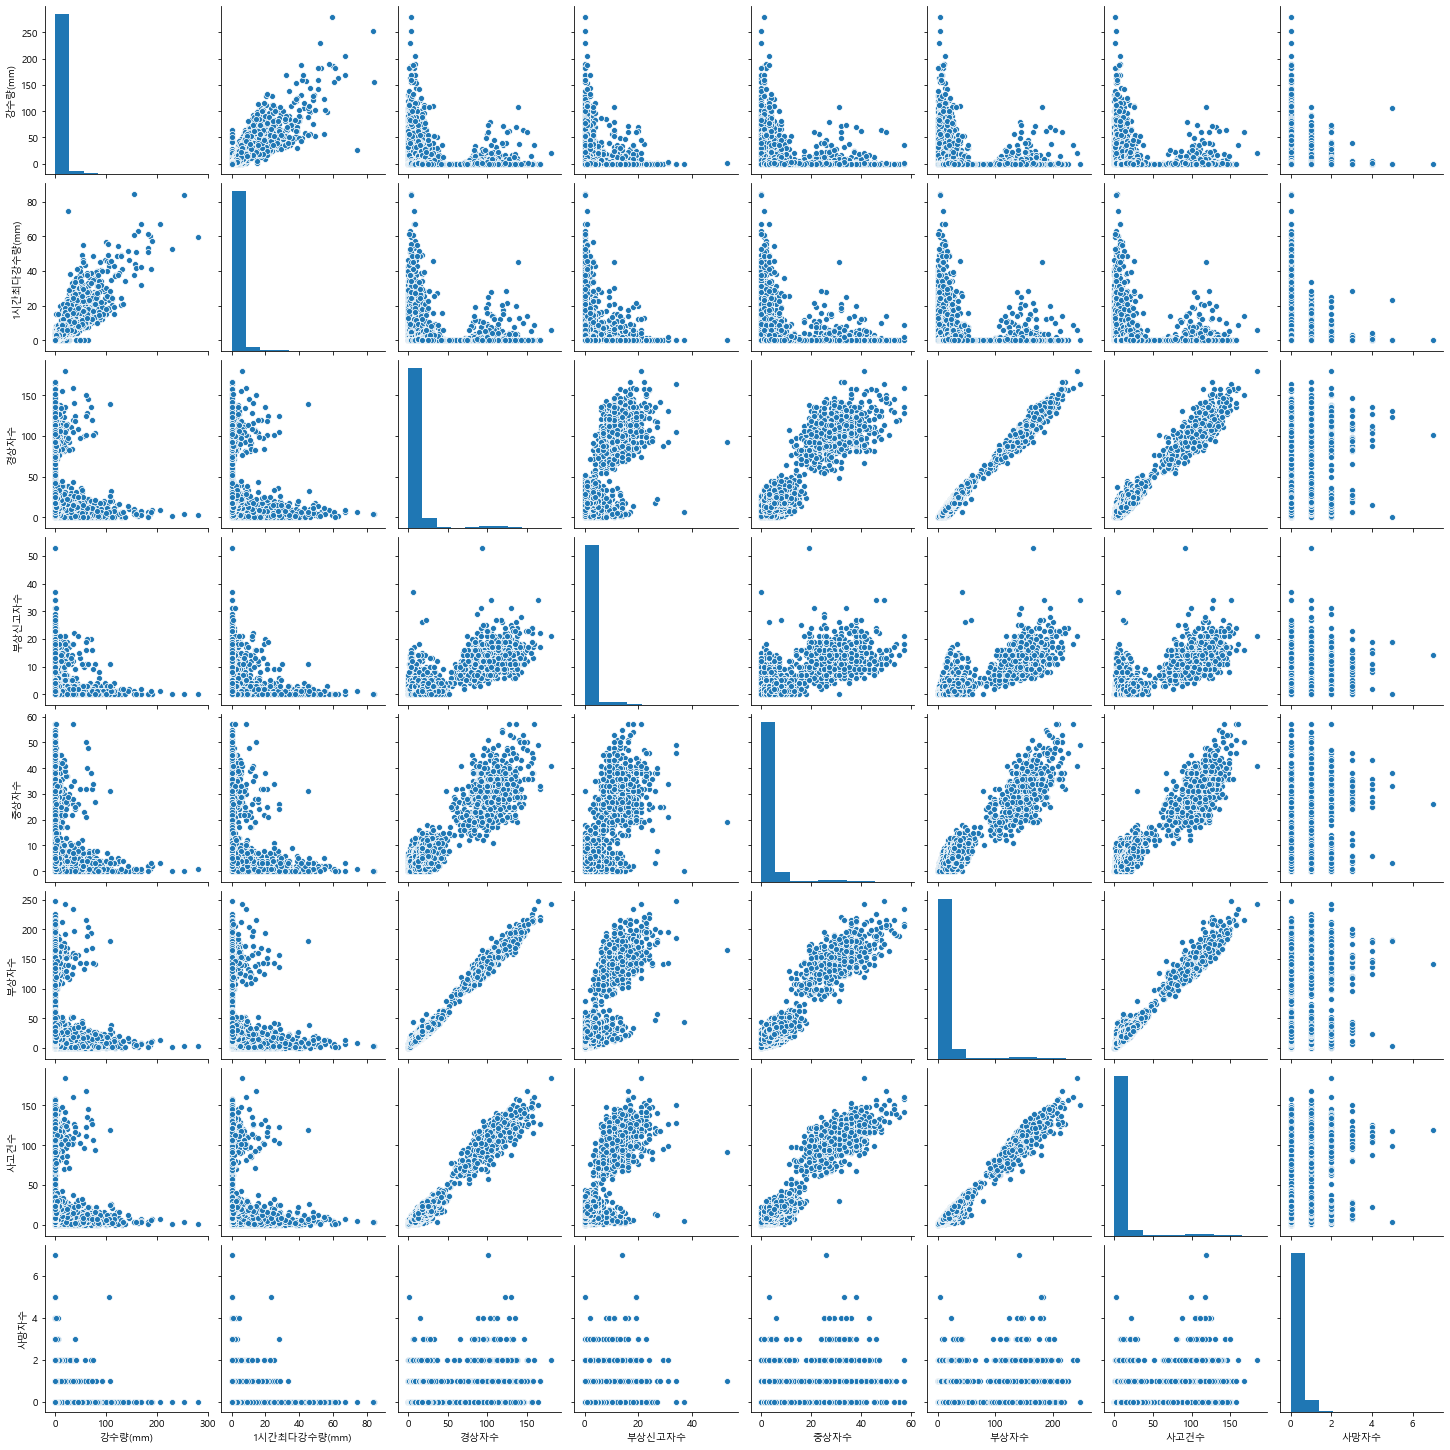

In [25]:
sns.pairplot(df, size = 2.5)

In [291]:
##### 강수량 0인 row 제외

idx = df[df["강수량(mm)"]==0.00].index
df_no_rain_drop = df.drop(idx)

In [292]:
df_no_rain_drop

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수
7,2018-01-08,0.376,0.32,서울,78,12,27,117,97,2
8,2018-01-09,0.040,0.05,서울,98,10,30,138,100,1
9,2018-01-10,0.042,0.03,서울,150,12,36,198,146,2
12,2018-01-13,0.016,0.00,서울,149,23,36,208,133,1
14,2018-01-15,0.008,0.00,서울,108,16,31,155,117,1
...,...,...,...,...,...,...,...,...,...,...
21161,2019-12-23,2.080,3.13,인천,27,0,3,30,22,0
21164,2019-12-26,0.370,0.29,인천,24,3,8,35,24,0
21166,2019-12-28,0.030,0.03,인천,25,4,6,35,24,0
21167,2019-12-29,1.000,0.58,인천,13,1,4,18,15,0


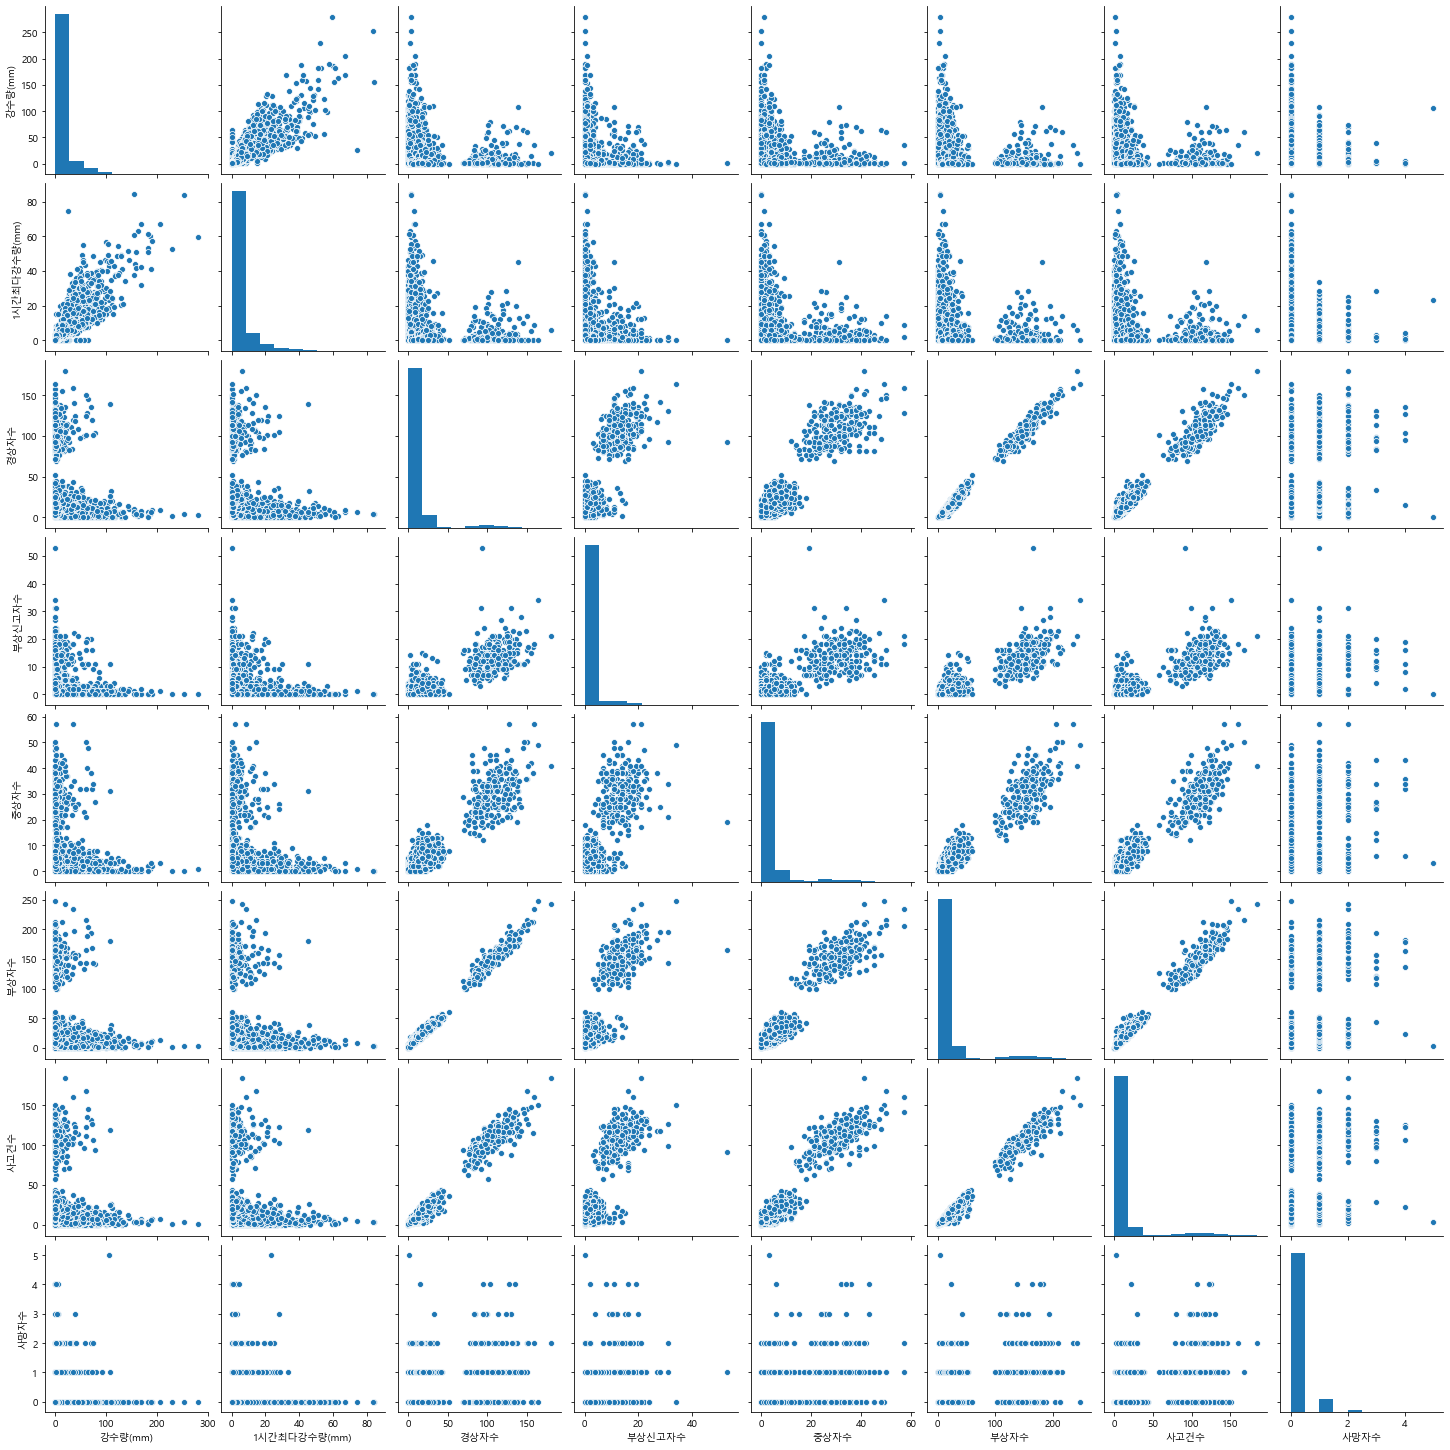

In [28]:
sns.pairplot(df_no_rain_drop, size = 2.5)

In [293]:
##### 서울 지점만 확인

df_seoul= df[df["지점명"] == "서울"]

df_seoul

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수
0,2018-01-01,0.000,0.00,서울,61,7,32,100,67,1
1,2018-01-02,0.000,0.00,서울,58,4,29,91,78,0
2,2018-01-03,0.000,0.00,서울,59,11,28,98,72,2
3,2018-01-04,0.000,0.00,서울,65,4,27,96,81,3
4,2018-01-05,0.000,0.00,서울,82,16,35,133,94,1
...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,0.000,0.00,서울,88,14,27,129,94,0
726,2019-12-28,0.000,0.00,서울,105,10,27,142,94,0
727,2019-12-29,0.906,0.56,서울,87,7,26,120,78,1
728,2019-12-30,0.226,0.32,서울,93,53,19,165,91,1


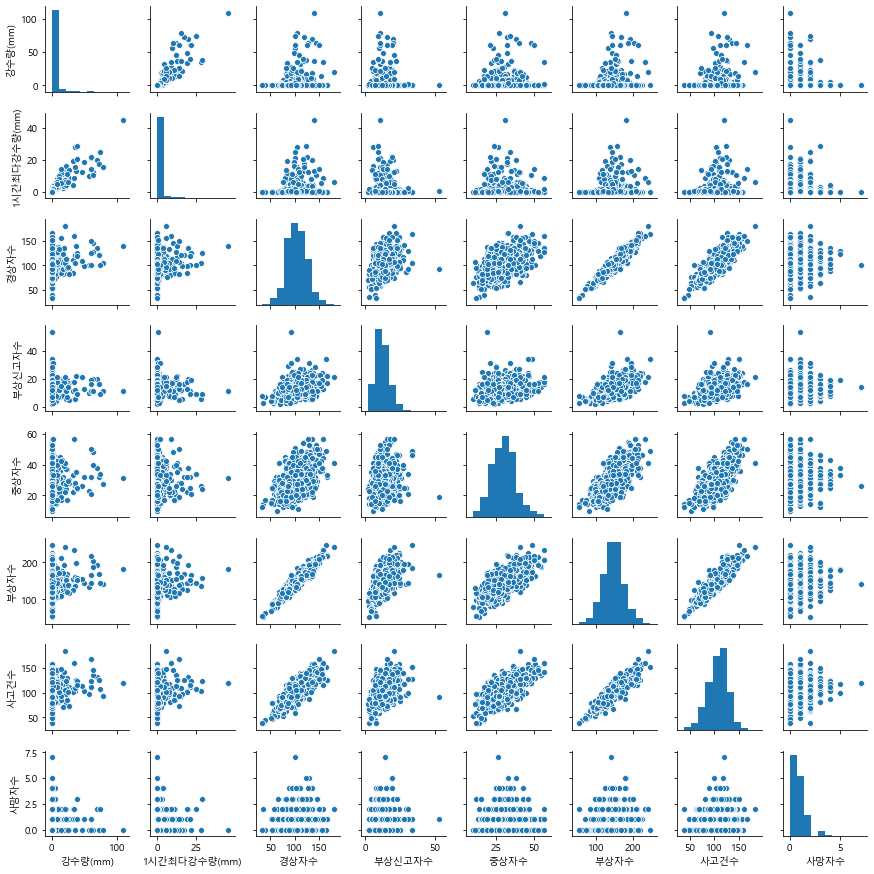

In [33]:
sns.pairplot(df_seoul, size = 1.5)

In [294]:
# 강수량0 + 서울

df_seoul_no_rain_drop = df_no_rain_drop[df_no_rain_drop["지점명"] == "서울"]

df_seoul_no_rain_drop

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수
7,2018-01-08,0.376,0.32,서울,78,12,27,117,97,2
8,2018-01-09,0.040,0.05,서울,98,10,30,138,100,1
9,2018-01-10,0.042,0.03,서울,150,12,36,198,146,2
12,2018-01-13,0.016,0.00,서울,149,23,36,208,133,1
14,2018-01-15,0.008,0.00,서울,108,16,31,155,117,1
...,...,...,...,...,...,...,...,...,...,...
720,2019-12-22,0.162,0.15,서울,85,16,23,124,73,1
721,2019-12-23,2.866,1.89,서울,100,14,33,147,113,0
724,2019-12-26,0.422,0.34,서울,88,8,27,123,91,1
727,2019-12-29,0.906,0.56,서울,87,7,26,120,78,1


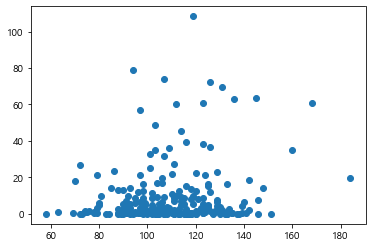

In [296]:
# sns.pairplot(df_seoul_no_rain_drop, size = 1.5)

plt.scatter(df_seoul_no_rain_drop["사고건수"],df_seoul_no_rain_drop["강수량(mm)"])

In [38]:
city_list = list(df["지점명"].unique())

In [39]:
city_list

# 동두천은 사고건수가 적어서 확인 불가
# 평택 / 서울 / 안산 / 부천 / 화성은 상대적으로 교통사고가 자주 일어남.
# 인천은 평균
# 의정부 / 김포 / 양주 / 시흥은 적음
# 의왕도 사고건수가 적지만 나름 우상승선을 보임.

['서울',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '김포',
 '남양주',
 '동두천',
 '부천',
 '성남',
 '수원',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '여주',
 '오산',
 '용인',
 '의왕',
 '의정부',
 '이천',
 '파주',
 '평택',
 '포천',
 '화성',
 '인천']

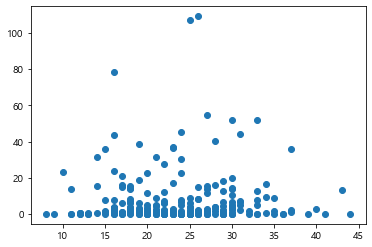

In [297]:
# 강수량0 + 인천

df_incheon_no_rain_drop = df_no_rain_drop[df_no_rain_drop["지점명"] == "인천"]

df_incheon_no_rain_drop

# sns.pairplot(df_incheon_no_rain_drop, size = 1.5)

plt.scatter(df_incheon_no_rain_drop["사고건수"],df_incheon_no_rain_drop["강수량(mm)"])

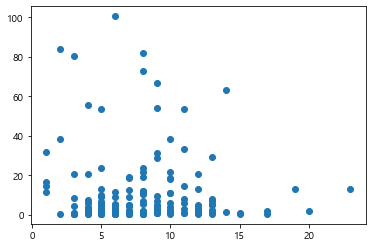

In [298]:
# 강수량0 + 화성

df_hwaseong_no_rain_drop = df_no_rain_drop[df_no_rain_drop["지점명"] == "화성"]

df_hwaseong_no_rain_drop

# sns.pairplot(df_hwaseong_no_rain_drop, size = 1.5)

plt.scatter(df_hwaseong_no_rain_drop["사고건수"],df_hwaseong_no_rain_drop["강수량(mm)"])

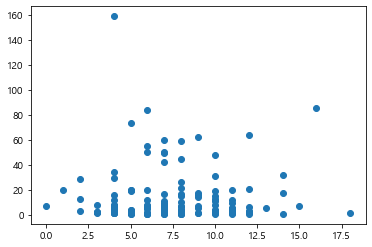

In [299]:
# 강수량0 + 시흥

df_sh_no_rain_drop = df_no_rain_drop[df_no_rain_drop["지점명"] == "시흥"]

df_sh_no_rain_drop

# sns.pairplot(df_sh_no_rain_drop, size = 1.5)

plt.scatter(df_sh_no_rain_drop["사고건수"],df_sh_no_rain_drop["강수량(mm)"])

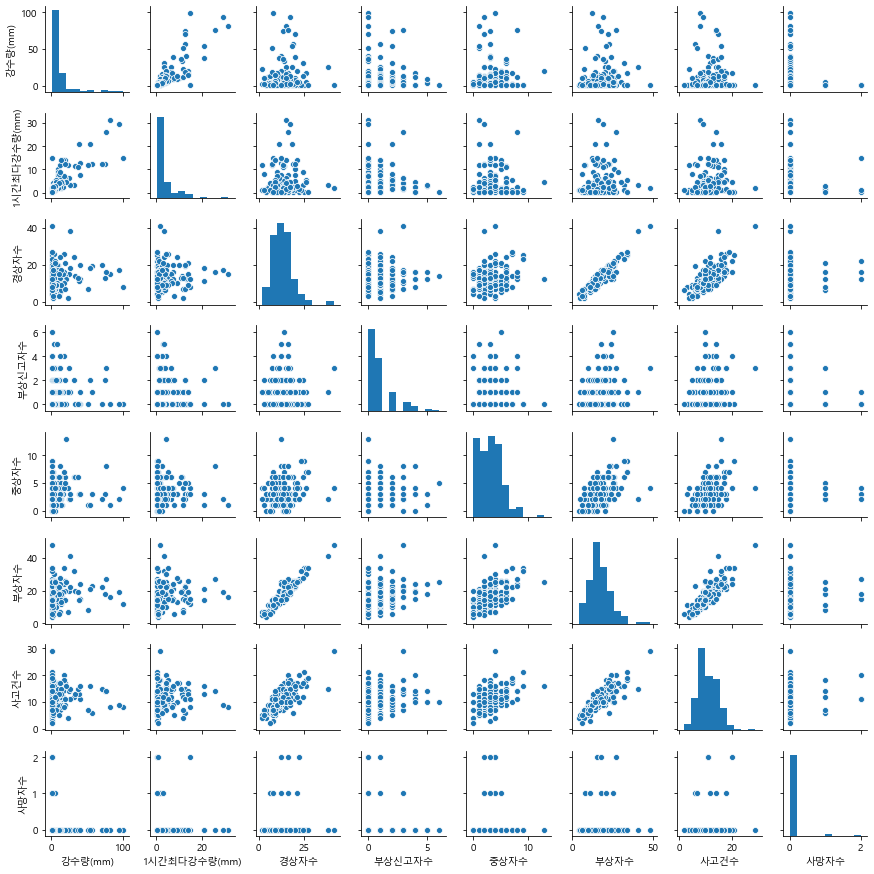

In [44]:
# 강수량0 + 안산

df_as_no_rain_drop = df_no_rain_drop[df_no_rain_drop["지점명"] == "안산"]

df_as_no_rain_drop

sns.pairplot(df_as_no_rain_drop, size = 1.5)

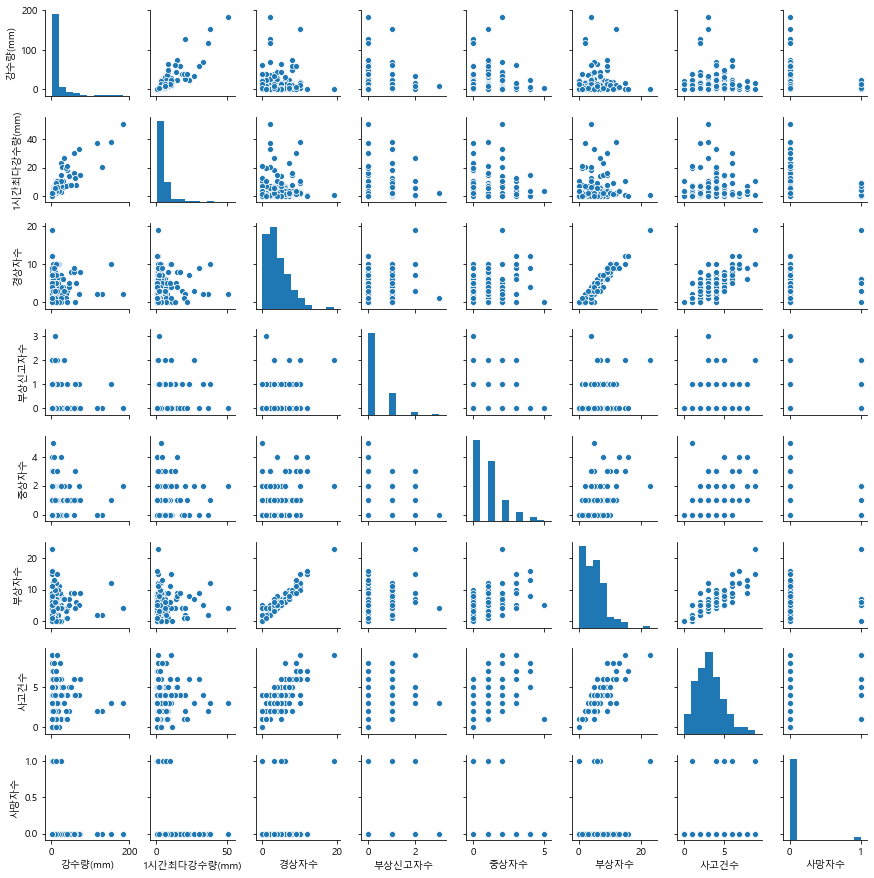

In [46]:
# 강수량0 + 양주

df_ddc_no_rain_drop = df_no_rain_drop[df_no_rain_drop["지점명"] == "양주"]

df_ddc_no_rain_drop

sns.pairplot(df_ddc_no_rain_drop, size = 1.5)

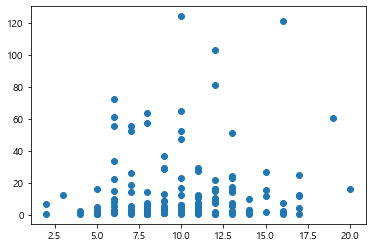

In [300]:
# 강수량0 + 부천

df_bc_no_rain_drop = df_no_rain_drop[df_no_rain_drop["지점명"] == "부천"]

df_bc_no_rain_drop

# sns.pairplot(df_bc_no_rain_drop, size = 1.5)
plt.scatter(df_bc_no_rain_drop["사고건수"],df_bc_no_rain_drop["강수량(mm)"])

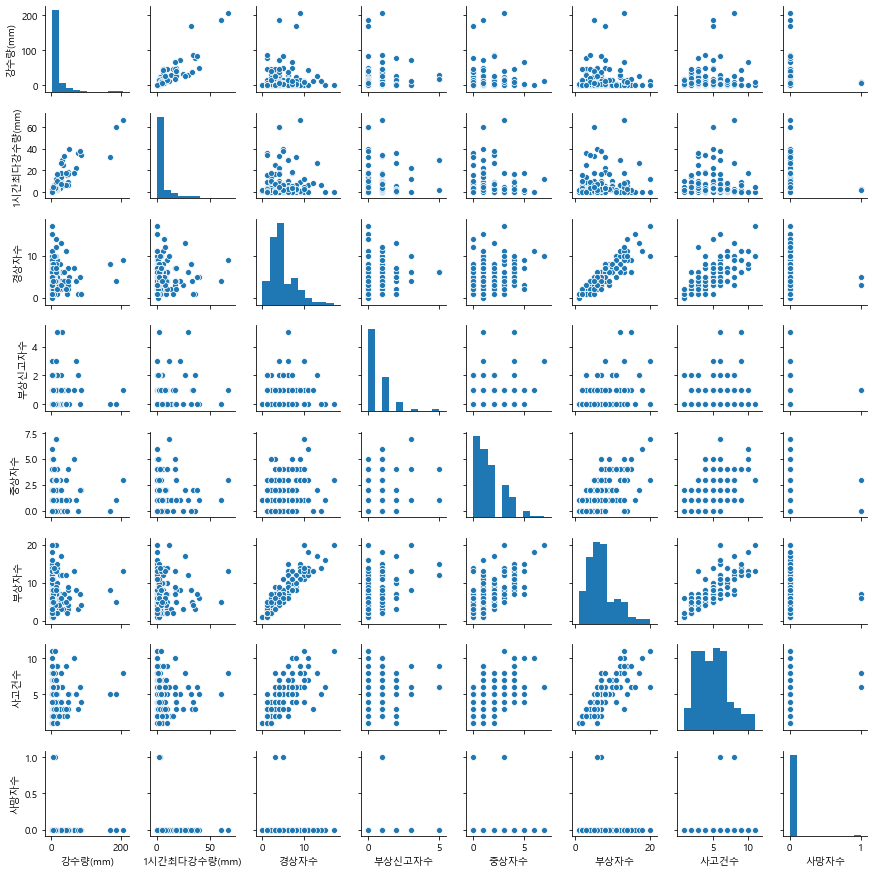

In [48]:
# 강수량0 + 김포

df_gp_no_rain_drop = df_no_rain_drop[df_no_rain_drop["지점명"] == "김포"]

df_gp_no_rain_drop

sns.pairplot(df_gp_no_rain_drop, size = 1.5)

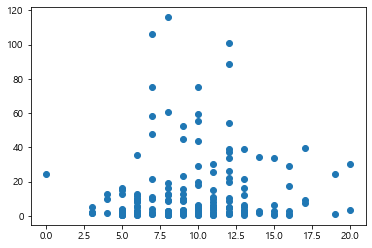

In [301]:
# 강수량0 + 평택

df_pt_no_rain_drop = df_no_rain_drop[df_no_rain_drop["지점명"] == "평택"]

df_pt_no_rain_drop

# sns.pairplot(df_pt_no_rain_drop, size = 1.5)
plt.scatter(df_pt_no_rain_drop["사고건수"],df_pt_no_rain_drop["강수량(mm)"])

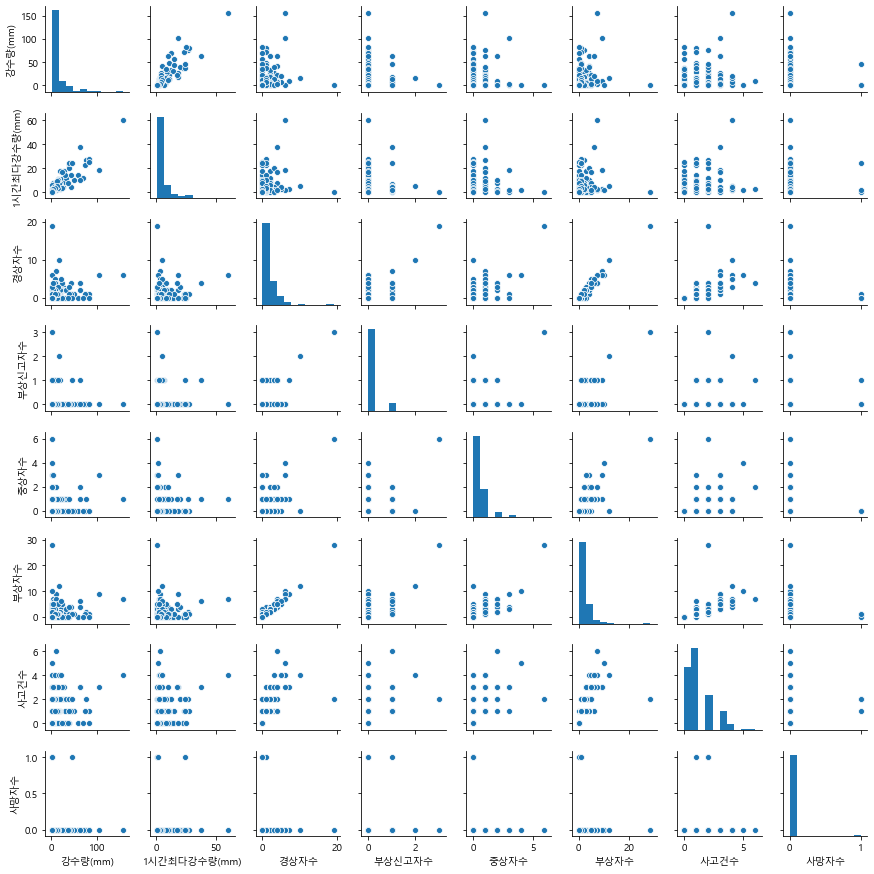

In [50]:
# 강수량0 + 의왕

df_yw_no_rain_drop = df_no_rain_drop[df_no_rain_drop["지점명"] == "의왕"]

df_yw_no_rain_drop

sns.pairplot(df_yw_no_rain_drop, size = 1.5)

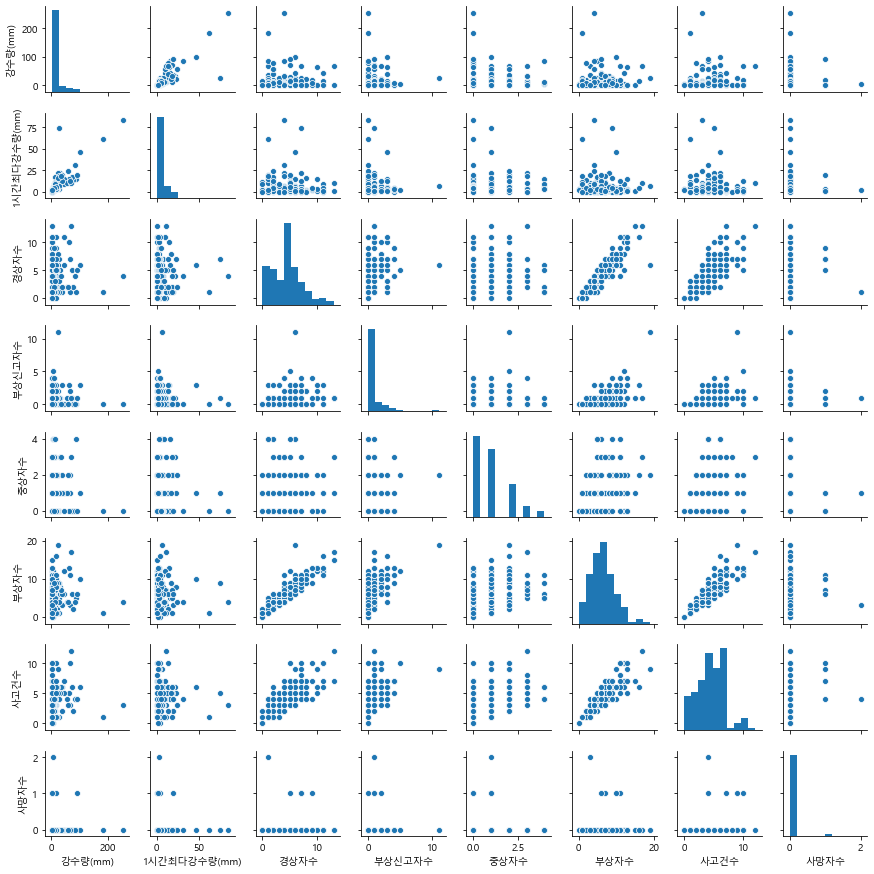

In [51]:
# 강수량0 + 의정부

df_yjb_no_rain_drop = df_no_rain_drop[df_no_rain_drop["지점명"] == "의정부"]

df_yjb_no_rain_drop

sns.pairplot(df_yjb_no_rain_drop, size = 1.5)

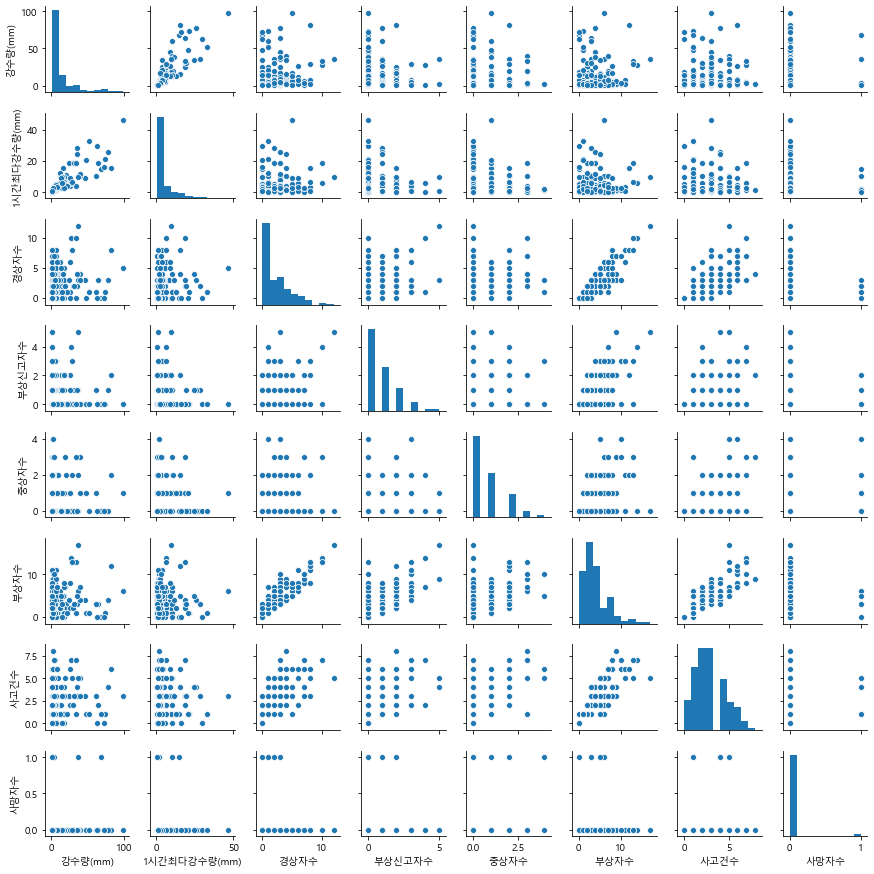

In [52]:
# 강수량0 + 광명

df_gm_no_rain_drop = df_no_rain_drop[df_no_rain_drop["지점명"] == "광명"]

df_gm_no_rain_drop

sns.pairplot(df_gm_no_rain_drop, size = 1.5)

In [3]:
traffic_data = pd.read_excel("./data/traffic_data.xlsx")

traffic_data

,발생일,발생시간,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구,법정동명,사고유형_대분류,...,노면상태,기상상태,가해당사자종별,가해자성별,가해자연령,가해자신체상해정도,피해당사자종별,피해자성별,피해자연령,피해자신체상해정도
0,20140101,00시,0,0,1,0,서울,종로구,숭인동,차대차,...,젖음/습기,흐림,승합차,남,48세,기타불명,승용차,남,65세,상해없음
1,20140101,00시,0,0,1,0,서울,강북구,번동,차대사람,...,건조,맑음,불명,기타불명,불명,기타불명,보행자,남,60세,경상
2,20140101,00시,0,1,0,0,서울,강동구,천호동,차대사람,...,건조,맑음,승용차,남,38세,상해없음,보행자,남,59세,중상
3,20140101,00시,0,0,2,0,서울,구로구,궁동,차대차,...,건조,맑음,승용차,남,25세,상해없음,승용차,남,41세,경상
4,20140101,00시,0,0,0,2,서울,구로구,오류동,차대차,...,건조,맑음,승용차,남,31세,상해없음,승용차,남,65세,부상신고
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550786,20191231,23시,0,0,0,2,서울,강남구,역삼동,차량단독,...,건조,맑음,승용차,남,59세,상해없음,없음,없음,없음,없음
550787,20191231,23시,0,0,1,0,서울,강남구,수서동,차대차,...,건조,맑음,승용차,남,50세,상해없음,승용차,남,53세,경상
550788,20191231,23시,0,1,0,0,경기,평택시,소사동,차대차,...,건조,맑음,승용차,여,46세,상해없음,이륜차,남,31세,중상
550789,20191231,23시,0,0,1,0,경기,과천시,과천동,차대차,...,건조,맑음,승용차,남,33세,상해없음,승합차,남,44세,경상


In [4]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550791 entries, 0 to 550790
Data columns (total 26 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   발생일        550791 non-null  int64 
 1   발생시간       550791 non-null  object
 2   사망자수       550791 non-null  int64 
 3   중상자수       550791 non-null  int64 
 4   경상자수       550791 non-null  int64 
 5   부상신고자수     550791 non-null  int64 
 6   발생지_시도     550791 non-null  object
 7   발생지_시군구    550791 non-null  object
 8   법정동명       550773 non-null  object
 9   사고유형_대분류   550791 non-null  object
 10  사고유형_중분류   550791 non-null  object
 11  사고유형       550791 non-null  object
 12  가해자법규위반    550791 non-null  object
 13  도로형태_대분류   550791 non-null  object
 14  도로형태       550791 non-null  object
 15  노면상태_대분류   550791 non-null  object
 16  노면상태       550791 non-null  object
 17  기상상태       550791 non-null  object
 18  가해당사자종별    550791 non-null  object
 19  가해자성별      550791 non-null  object
 20  가해자연

In [5]:
del traffic_data["법정동명"]

In [7]:
traffic_data["발생일"] = pd.to_datetime(traffic_data["발생일"], format="%Y%m%d")

In [8]:
traffic_data.head()

,발생일,발생시간,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구,사고유형_대분류,사고유형_중분류,...,노면상태,기상상태,가해당사자종별,가해자성별,가해자연령,가해자신체상해정도,피해당사자종별,피해자성별,피해자연령,피해자신체상해정도
0,2014-01-01,00시,0,0,1,0,서울,종로구,차대차,측면충돌,...,젖음/습기,흐림,승합차,남,48세,기타불명,승용차,남,65세,상해없음
1,2014-01-01,00시,0,0,1,0,서울,강북구,차대사람,횡단중,...,건조,맑음,불명,기타불명,불명,기타불명,보행자,남,60세,경상
2,2014-01-01,00시,0,1,0,0,서울,강동구,차대사람,횡단중,...,건조,맑음,승용차,남,38세,상해없음,보행자,남,59세,중상
3,2014-01-01,00시,0,0,2,0,서울,구로구,차대차,추돌,...,건조,맑음,승용차,남,25세,상해없음,승용차,남,41세,경상
4,2014-01-01,00시,0,0,0,2,서울,구로구,차대차,기타,...,건조,맑음,승용차,남,31세,상해없음,승용차,남,65세,부상신고


In [17]:
traffic_data_seoul = traffic_data[traffic_data["발생지_시도"] == "서울"]
traffic_data_seoul["지점명"] = traffic_data_seoul["발생지_시도"]
del traffic_data_seoul["발생지_시도"]
del traffic_data_seoul["발생지_시군구"]

In [27]:
traffic_data_seoul.rename(columns = {"발생일":"날짜"},inplace=True)

traffic_data_seoul

,날짜,발생시간,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,...,기상상태,가해당사자종별,가해자성별,가해자연령,가해자신체상해정도,피해당사자종별,피해자성별,피해자연령,피해자신체상해정도,지점명
0,2014-01-01,00시,0,0,1,0,차대차,측면충돌,측면충돌,안전운전 의무 불이행,...,흐림,승합차,남,48세,기타불명,승용차,남,65세,상해없음,서울
1,2014-01-01,00시,0,0,1,0,차대사람,횡단중,횡단중,안전운전 의무 불이행,...,맑음,불명,기타불명,불명,기타불명,보행자,남,60세,경상,서울
2,2014-01-01,00시,0,1,0,0,차대사람,횡단중,횡단중,보행자 보호의무 위반,...,맑음,승용차,남,38세,상해없음,보행자,남,59세,중상,서울
3,2014-01-01,00시,0,0,2,0,차대차,추돌,진행중 추돌,안전운전 의무 불이행,...,맑음,승용차,남,25세,상해없음,승용차,남,41세,경상,서울
4,2014-01-01,00시,0,0,0,2,차대차,기타,기타,안전운전 의무 불이행,...,맑음,승용차,남,31세,상해없음,승용차,남,65세,부상신고,서울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550776,2019-12-31,22시,0,0,0,1,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,...,맑음,화물차,남,28세,상해없음,보행자,여,33세,부상신고,서울
550777,2019-12-31,22시,0,0,1,0,차대차,기타,기타,안전거리 미확보,...,맑음,승용차,여,41세,상해없음,승용차,여,61세,경상,서울
550778,2019-12-31,22시,0,0,1,0,차대사람,횡단중,횡단중,보행자 보호의무 위반,...,맑음,승용차,남,36세,상해없음,보행자,여,18세,경상,서울
550786,2019-12-31,23시,0,0,0,2,차량단독,기타,기타,기타,...,맑음,승용차,남,59세,상해없음,없음,없음,없음,없음,서울


In [14]:
df

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수
0,2018-01-01,0.00,0.00,서울,61,7,32,100,67,1
1,2018-01-02,0.00,0.00,서울,58,4,29,91,78,0
2,2018-01-03,0.00,0.00,서울,59,11,28,98,72,2
3,2018-01-04,0.00,0.00,서울,65,4,27,96,81,3
4,2018-01-05,0.00,0.00,서울,82,16,35,133,94,1
...,...,...,...,...,...,...,...,...,...,...
21165,2019-12-27,0.00,0.00,인천,17,2,6,25,22,0
21166,2019-12-28,0.03,0.03,인천,25,4,6,35,24,0
21167,2019-12-29,1.00,0.58,인천,13,1,4,18,15,0
21168,2019-12-30,0.18,0.24,인천,17,2,5,24,20,0


In [36]:
traffic_data_seoul["날짜"].value_counts()

2015-11-07    193
2019-11-15    184
2014-11-28    182
2016-12-29    176
2017-01-25    175
             ... 
2016-02-08     45
2015-02-19     41
2018-02-17     38
2019-02-05     38
2014-01-31     33
Name: 날짜, Length: 2191, dtype: int64

In [38]:
traffic_data_seoul.query('"2018-01-01"<= 날짜 <= "2019-12-31"', inplace=True)

In [39]:
traffic_data_seoul

,날짜,발생시간,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,...,기상상태,가해당사자종별,가해자성별,가해자연령,가해자신체상해정도,피해당사자종별,피해자성별,피해자연령,피해자신체상해정도,지점명
363827,2018-01-01,00시,0,0,2,0,차대차,측면충돌,측면충돌,안전운전 의무 불이행,...,흐림,승용차,남,35세,경상,승용차,남,63세,경상,서울
363828,2018-01-01,00시,0,1,1,0,차대차,측면충돌,측면충돌,안전운전 의무 불이행,...,흐림,승용차,남,76세,상해없음,화물차,남,58세,경상,서울
363829,2018-01-01,00시,0,0,1,0,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,...,맑음,승용차,남,19세,상해없음,보행자,여,38세,경상,서울
363830,2018-01-01,00시,0,1,0,0,차대사람,횡단중,횡단중,보행자 보호의무 위반,...,맑음,승용차,남,64세,상해없음,보행자,남,56세,중상,서울
363835,2018-01-01,01시,0,0,1,0,차대사람,기타,기타,안전운전 의무 불이행,...,흐림,이륜차,남,17세,기타불명,보행자,남,64세,경상,서울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550776,2019-12-31,22시,0,0,0,1,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,...,맑음,화물차,남,28세,상해없음,보행자,여,33세,부상신고,서울
550777,2019-12-31,22시,0,0,1,0,차대차,기타,기타,안전거리 미확보,...,맑음,승용차,여,41세,상해없음,승용차,여,61세,경상,서울
550778,2019-12-31,22시,0,0,1,0,차대사람,횡단중,횡단중,보행자 보호의무 위반,...,맑음,승용차,남,36세,상해없음,보행자,여,18세,경상,서울
550786,2019-12-31,23시,0,0,0,2,차량단독,기타,기타,기타,...,맑음,승용차,남,59세,상해없음,없음,없음,없음,없음,서울


In [118]:
tmp = pd.DataFrame(traffic_data_seoul["날짜"].value_counts())

tmp = tmp.sort_index()
tmp.rename(columns={"날짜":"사고건수"}, inplace=True)
tmp

tmp.reset_index(inplace=True)

tmp['날짜'] = pd.to_datetime(tmp['index'], format='%Y-%m-%d')
del tmp["index"]

tmp

,사고건수,날짜
0,67,2018-01-01
1,78,2018-01-02
2,72,2018-01-03
3,81,2018-01-04
4,94,2018-01-05
...,...,...
725,94,2019-12-27
726,94,2019-12-28
727,78,2019-12-29
728,91,2019-12-30


In [68]:
traffic_data_seoul["사망자수"].value_counts()

0    77503
1      546
2        4
Name: 사망자수, dtype: int64

In [69]:
traffic_data_seoul["피해자신체상해정도"].value_counts()

경상      45424
중상      15760
상해없음    10189
부상신고     3311
없음       2503
기타불명      490
사망        376
Name: 피해자신체상해정도, dtype: int64

In [123]:
df_no_rain_drop

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수
7,2018-01-08,0.376,0.32,서울,78,12,27,117,97,2
8,2018-01-09,0.040,0.05,서울,98,10,30,138,100,1
9,2018-01-10,0.042,0.03,서울,150,12,36,198,146,2
12,2018-01-13,0.016,0.00,서울,149,23,36,208,133,1
14,2018-01-15,0.008,0.00,서울,108,16,31,155,117,1
...,...,...,...,...,...,...,...,...,...,...
21161,2019-12-23,2.080,3.13,인천,27,0,3,30,22,0
21164,2019-12-26,0.370,0.29,인천,24,3,8,35,24,0
21166,2019-12-28,0.030,0.03,인천,25,4,6,35,24,0
21167,2019-12-29,1.000,0.58,인천,13,1,4,18,15,0


In [120]:
# df_no_rain_drop["경상"] = pd.Series()
# df_no_rain_drop["중상"] = pd.Series()
# df_no_rain_drop["상해없음"] = pd.Series()
# df_no_rain_drop["부상신고"] = pd.Series()
# df_no_rain_drop["없음"] = pd.Series()
# df_no_rain_drop["기타불명"] = pd.Series()

del df_no_rain_drop["경상"]
del df_no_rain_drop["중상"]
del df_no_rain_drop["상해없음"]
del df_no_rain_drop["부상신고"]
del df_no_rain_drop["없음"]
del df_no_rain_drop["기타불명"]

In [121]:
df_no_rain_drop

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수
7,2018-01-08,0.376,0.32,서울,78,12,27,117,97,2
8,2018-01-09,0.040,0.05,서울,98,10,30,138,100,1
9,2018-01-10,0.042,0.03,서울,150,12,36,198,146,2
12,2018-01-13,0.016,0.00,서울,149,23,36,208,133,1
14,2018-01-15,0.008,0.00,서울,108,16,31,155,117,1
...,...,...,...,...,...,...,...,...,...,...
21161,2019-12-23,2.080,3.13,인천,27,0,3,30,22,0
21164,2019-12-26,0.370,0.29,인천,24,3,8,35,24,0
21166,2019-12-28,0.030,0.03,인천,25,4,6,35,24,0
21167,2019-12-29,1.000,0.58,인천,13,1,4,18,15,0


In [127]:
df_no_rain_drop['month'] = df_no_rain_drop['날짜'].dt.month
df_no_rain_drop


,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,month
7,2018-01-08,0.376,0.32,서울,78,12,27,117,97,2,1
8,2018-01-09,0.040,0.05,서울,98,10,30,138,100,1,1
9,2018-01-10,0.042,0.03,서울,150,12,36,198,146,2,1
12,2018-01-13,0.016,0.00,서울,149,23,36,208,133,1,1
14,2018-01-15,0.008,0.00,서울,108,16,31,155,117,1,1
...,...,...,...,...,...,...,...,...,...,...,...
21161,2019-12-23,2.080,3.13,인천,27,0,3,30,22,0,12
21164,2019-12-26,0.370,0.29,인천,24,3,8,35,24,0,12
21166,2019-12-28,0.030,0.03,인천,25,4,6,35,24,0,12
21167,2019-12-29,1.000,0.58,인천,13,1,4,18,15,0,12


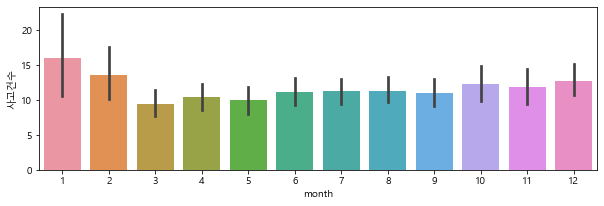

In [128]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop, x="month", y="사고건수")

In [129]:
df_no_rain_drop["지점명"].unique()

array(['서울', '고양', '과천', '광명', '광주', '구리', '군포', '김포', '남양주', '동두천', '부천',
       '성남', '수원', '시흥', '안산', '안성', '안양', '양주', '여주', '오산', '용인', '의왕',
       '의정부', '이천', '파주', '평택', '포천', '화성', '인천'], dtype=object)

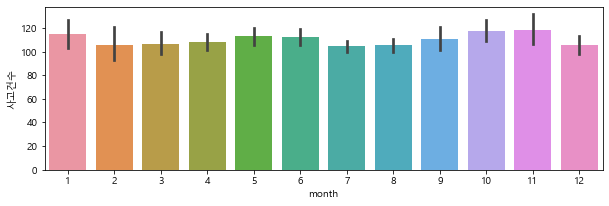

In [131]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="서울"], x="month", y="사고건수")

## 서울 : 전체적으로 높음

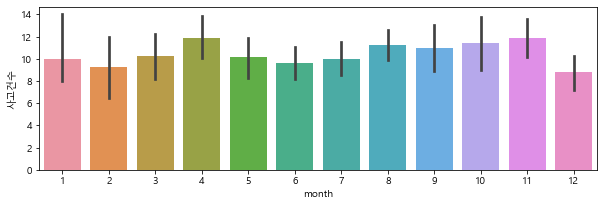

In [132]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="고양"], x="month", y="사고건수")

## 고양 : 전체적으로 높으나 겨울보단 여름 / 가을이 높음

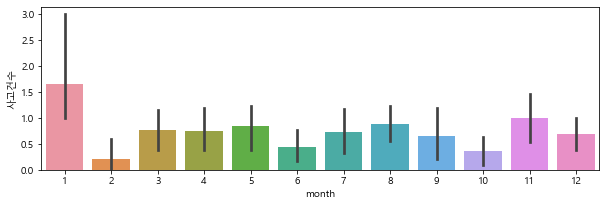

In [133]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="과천"], x="month", y="사고건수")

## 과천 : 전체적으로 적으나 겨울이 높음

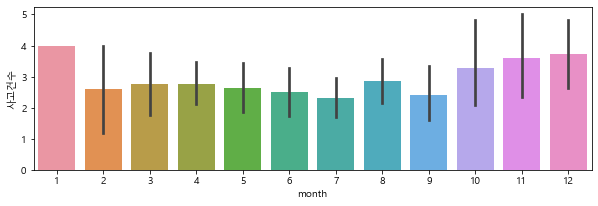

In [134]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="광명"], x="month", y="사고건수")

## 광명 : 겨울이 높음

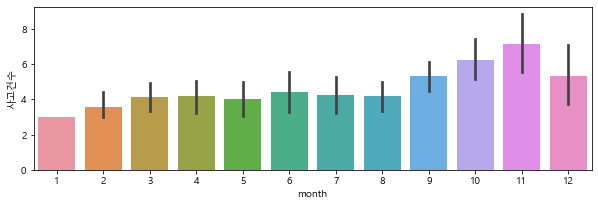

In [135]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="광주"], x="month", y="사고건수")

## 광주 : 가을에서부터 겨울이 높음

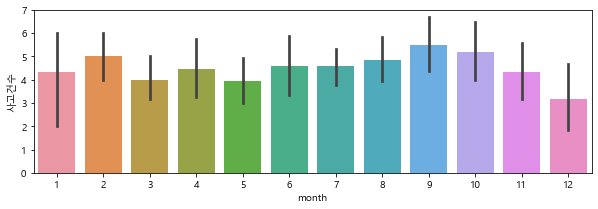

In [136]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="김포"], x="month", y="사고건수")

## 김포 : 대체적으로 가을이 높은 듯 보이나, 1 / 2월도 높음

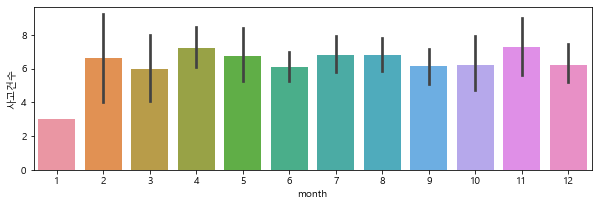

In [137]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="남양주"], x="month", y="사고건수")

## 남양주 : 1월달에 비정상적으로 낮은 수치를 보이나 평균적으로 고루 분포

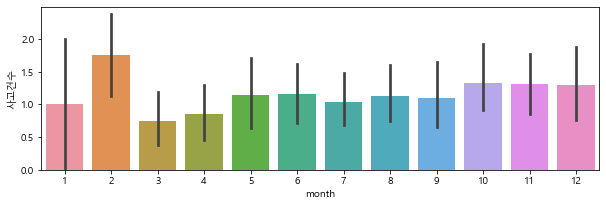

In [138]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="동두천"], x="month", y="사고건수")

## 동두천 : 평균적으로 낮은 수치를 보여줌.

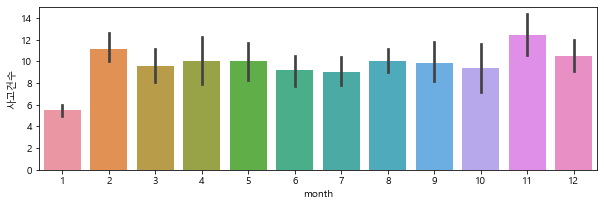

In [139]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="부천"], x="month", y="사고건수")

## 부천 : 1월이 낮으나 11월 / 12월에 유독 높음

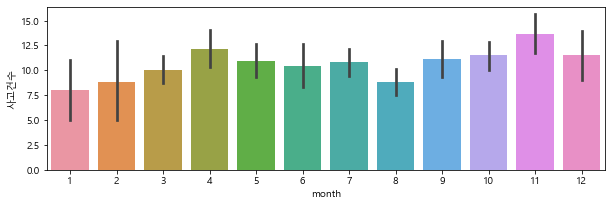

In [140]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="성남"], x="month", y="사고건수")

## 성남 : 대체적으로 고루 분포하나 11월이 가장 높음

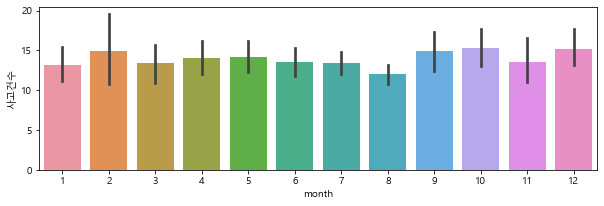

In [141]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="수원"], x="month", y="사고건수")

## 수원 : 대체적으로 높게 고루 분포

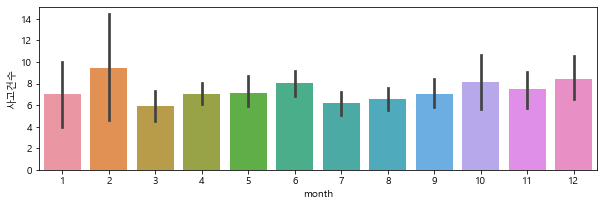

In [142]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="시흥"], x="month", y="사고건수")

## 시흥 : 전체적으로 낮으나 2월이 높음

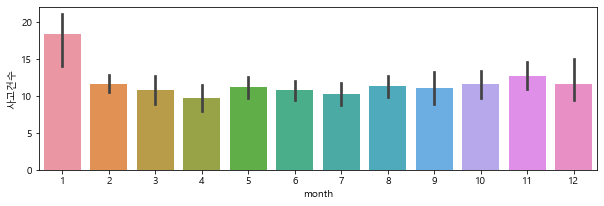

In [143]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="안산"], x="month", y="사고건수")

## 안산 : 전체적으로 비슷하나 1월이 압도적으로 많음.

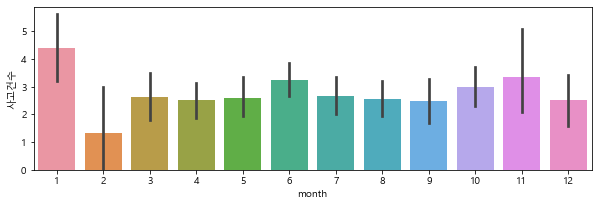

In [144]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="안성"], x="month", y="사고건수")

## 안성 : 전체적으로 교통사고 빈도수가 적음.

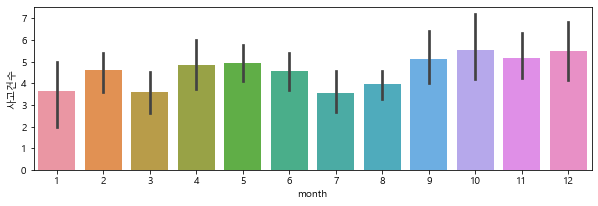

In [145]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="안양"], x="month", y="사고건수")

## 안양 : 전체적으로 고루 분포되어 있으나 가을 / 겨울이 높음

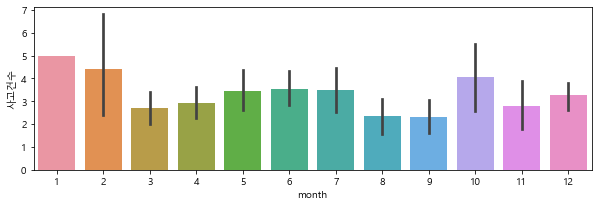

In [146]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="양주"], x="month", y="사고건수")

## 양주 : 전체적으로 고루 분포되어 있으나 가을 / 겨울이 높음

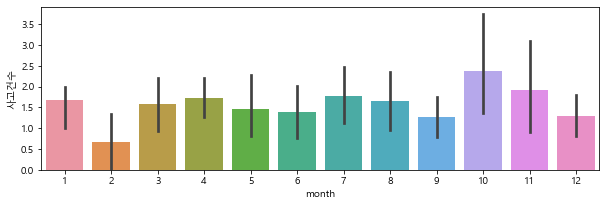

In [147]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="여주"], x="month", y="사고건수")

## 여주 : 전체적으로 사고가 적음.

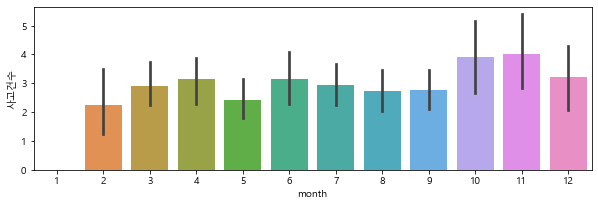

In [148]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="오산"], x="month", y="사고건수")

## 오산 : 가을 / 겨울에 대체적으로 사고가 많이 일어남.

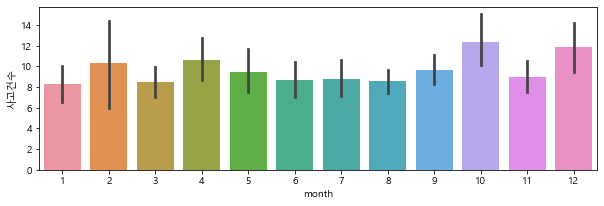

In [149]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="용인"], x="month", y="사고건수")

## 용인 : 대체적으로 비슷

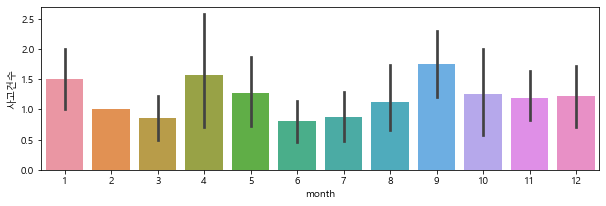

In [150]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="의왕"], x="month", y="사고건수")

## 의왕 : 대체적으로 매우 적으나 1월 4월 9월에 많이 일어나고 여름에 사고가 잘 나지않음.

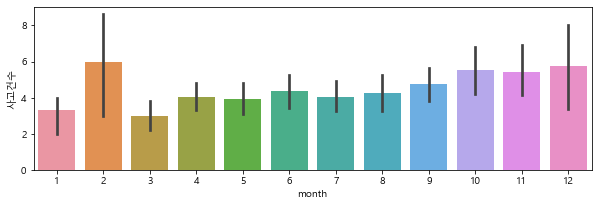

In [151]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="의정부"], x="month", y="사고건수")

## 의정부 : 대체적으로 매우 적으나 1월 4월 9월에 많이 일어나고 여름에 사고가 잘 나지않음.

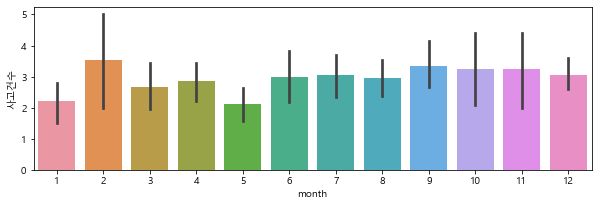

In [152]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="이천"], x="month", y="사고건수")

## 이천 : 대체적으로 매우 적으나 봄에 사고가 적음.

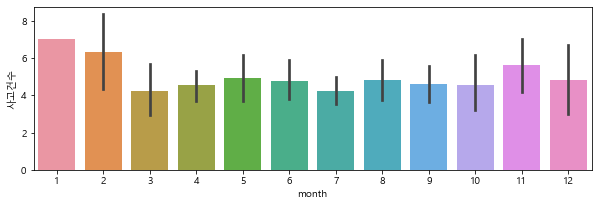

In [153]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="파주"], x="month", y="사고건수")

## 파주 : 고루 분포되어있으나 1 / 2월에 사고가 많이 일어나는 경향임.

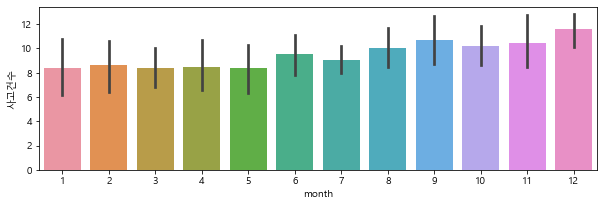

In [154]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="평택"], x="month", y="사고건수")

## 평택 : 여름 - 가을 - 겨울까지 사고율이 꾸준히 높아지다 1월에 다시 돌아오는 모습.

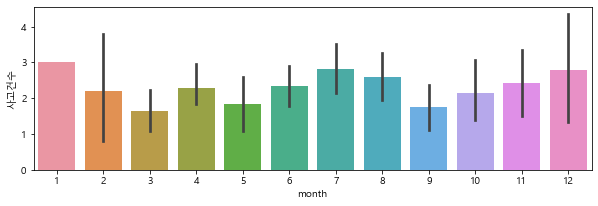

In [155]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="포천"], x="month", y="사고건수")

## 포천 : 여름 - 가을 - 겨울까지 사고율이 꾸준히 높아지다 1월에 다시 돌아오는 모습.

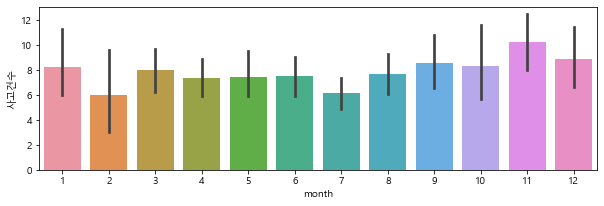

In [156]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="화성"], x="month", y="사고건수")

## 화성 : 대체적으로 비슷하나 11월이 유독 높음.

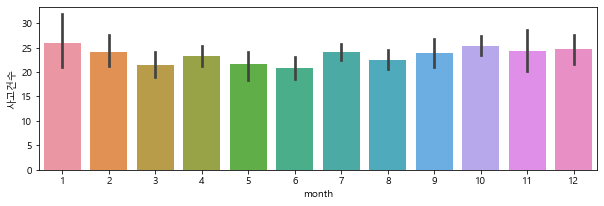

In [157]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop[df_no_rain_drop["지점명"]=="인천"], x="month", y="사고건수")

## 인천 : 대체적으로 매우 높으며 고르게 분포.

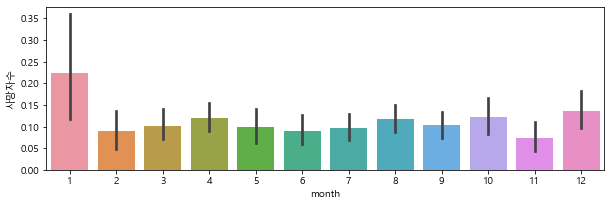

In [158]:
### 달의 사망자수

plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop, x="month", y="사망자수")

## 사망자수 확인결과 12월과 1월달에 많은 것으로 확인.

In [160]:
df_no_rain_drop["사망률"] = df_no_rain_drop["사망자수"]/df_no_rain_drop["부상자수"] * 100

In [161]:
df_no_rain_drop

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,month,사망률
7,2018-01-08,0.376,0.32,서울,78,12,27,117,97,2,1,1.709402
8,2018-01-09,0.040,0.05,서울,98,10,30,138,100,1,1,0.724638
9,2018-01-10,0.042,0.03,서울,150,12,36,198,146,2,1,1.010101
12,2018-01-13,0.016,0.00,서울,149,23,36,208,133,1,1,0.480769
14,2018-01-15,0.008,0.00,서울,108,16,31,155,117,1,1,0.645161
...,...,...,...,...,...,...,...,...,...,...,...,...
21161,2019-12-23,2.080,3.13,인천,27,0,3,30,22,0,12,0.000000
21164,2019-12-26,0.370,0.29,인천,24,3,8,35,24,0,12,0.000000
21166,2019-12-28,0.030,0.03,인천,25,4,6,35,24,0,12,0.000000
21167,2019-12-29,1.000,0.58,인천,13,1,4,18,15,0,12,0.000000


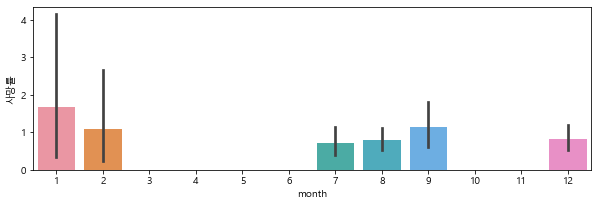

In [162]:
### 달의 사망률

plt.figure(figsize=(10, 3))
sns.barplot(data=df_no_rain_drop, x="month", y="사망률")

## 사망률 확인 결과 겨울과 여름~가을이 바뀌는 시기에 사망자가 발생하는 것을 확인.


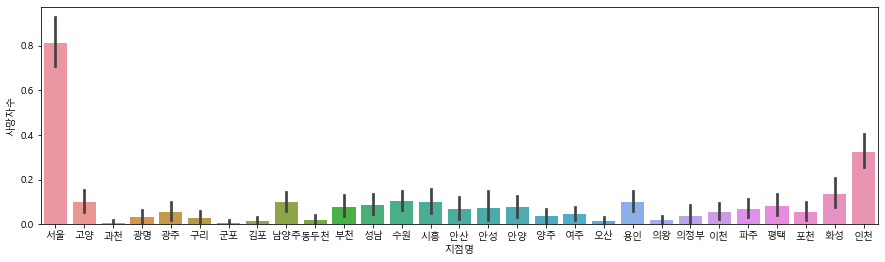

In [168]:
### 시별 사망자수

plt.figure(figsize=(15, 4))
sns.barplot(data=df_no_rain_drop, x="지점명", y="사망자수")

"""
서울 : 955만 227명
고양 : 108만 240명
과천 : 6만 9,910명
광명 : 29만 4,458명
광주 : 38만 6,496명
구리 : 19만 3,014명
군포 : 26만 9,215명
김포 : 48만 5,859명
남양주 : 72만 9,918명
동두천 : 9만 3,508명
부천 : 80만 8,047명
성남 : 93만 1,319명
수원 : 118만 5,276명
시흥 : 51만 1,888명
안산 : 65만 4,117명
안성 : 18만 9,732명
안양 : 54만 7,258명
양주 : 23만 6,205명
여주 : 11만 2,260명
오산 : 23만 403명
용인 : 107만 9,609명
의왕 : 16만 3,704명
의정부 : 46만 3,665명
이천 : 22만 4,066명
파주 : 47만 9,183명
평택 : 55만 9,363명
포천 : 14만 8,618명
화성 : 88만 1,154명
인천 : 293만 8,429명
"""

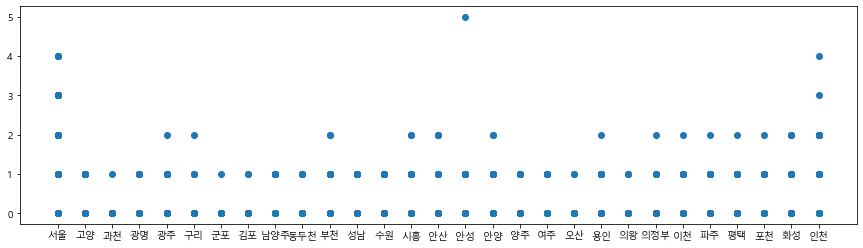

In [179]:
plt.figure(figsize=(15, 4))
plt.scatter(df_no_rain_drop["지점명"],df_no_rain_drop["사망자수"])

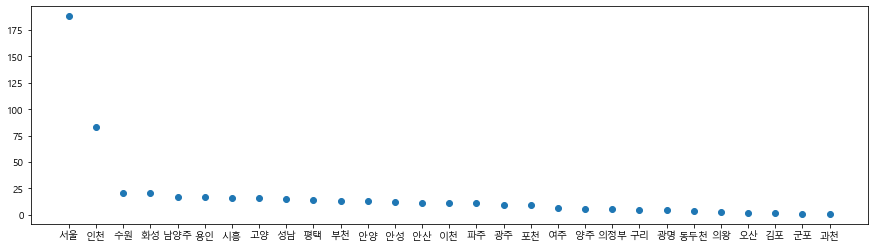

In [199]:
### 지역별 총 사망자수

death_area = list(df_no_rain_drop["지점명"].unique())
death_list = {}

for area in death_area:
    death = df_no_rain_drop[df_no_rain_drop["지점명"] == area]["사망자수"].sum()
    death_list[area] = death
    
death_series = pd.Series(death_list)
death_series = death_series.sort_values(ascending=False)

plt.figure(figsize=(15, 4))
plt.scatter(death_series.index,death_series.values)

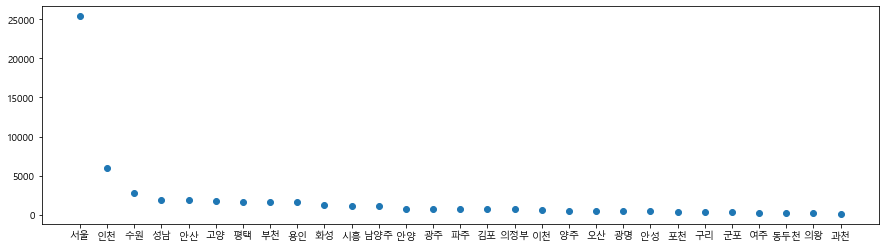

In [203]:
### 지역별 총 사고건수

death_area = list(df_no_rain_drop["지점명"].unique())
death_list = {}

for area in death_area:
    death = df_no_rain_drop[df_no_rain_drop["지점명"] == area]["사고건수"].sum()
    death_list[area] = death
    
death_series = pd.Series(death_list)
death_series = death_series.sort_values(ascending=False)

plt.figure(figsize=(15, 4))
plt.scatter(death_series.index,death_series.values)
## 사망자수와 비교결과 사고건수와 사망자수는 대체로 맞는 것을 확인해볼 수 있음.

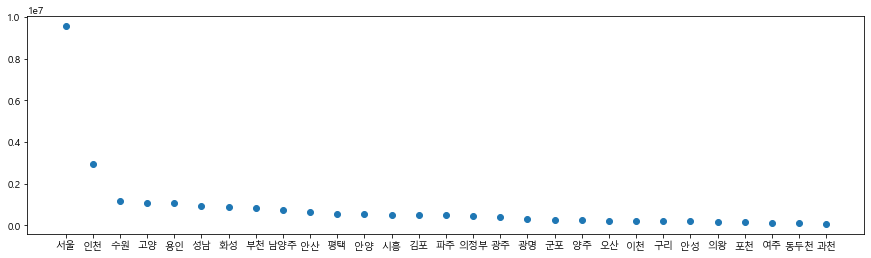

In [204]:
pop_dict = {"서울" : 9550227, "고양" : 1080240,"과천" : 69910,"광명" : 294458,"광주" : 386496,"구리" : 193014,"군포" : 269215,
            '김포' : 485859,'남양주' : 729918,'동두천' : 93508,'부천' : 808047,'성남' : 931319,'수원' : 1185276,'시흥' : 511888,'안산' : 654117,
            '안성' : 189732,'안양' : 547258,'양주' : 236205,'여주' : 112260,'오산' : 230403,'용인' : 1079609,'의왕' : 163704,'의정부' : 463665,
            '이천' : 224066,'파주' : 479183,'평택' : 559363,'포천' : 148618,'화성' : 881154,'인천' : 2938429}

pop_se = pd.Series(pop_dict)
pop_se = pop_se.sort_values(ascending=False)

plt.figure(figsize=(15, 4))
plt.scatter(pop_se.index,pop_se.values)

## 인구수 순위와 사고건수 순위를 비교결과 거의 비슷하다는 점을 확인할 수 있음.

In [205]:
df_no_rain_drop

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,month,사망률
7,2018-01-08,0.376,0.32,서울,78,12,27,117,97,2,1,1.709402
8,2018-01-09,0.040,0.05,서울,98,10,30,138,100,1,1,0.724638
9,2018-01-10,0.042,0.03,서울,150,12,36,198,146,2,1,1.010101
12,2018-01-13,0.016,0.00,서울,149,23,36,208,133,1,1,0.480769
14,2018-01-15,0.008,0.00,서울,108,16,31,155,117,1,1,0.645161
...,...,...,...,...,...,...,...,...,...,...,...,...
21161,2019-12-23,2.080,3.13,인천,27,0,3,30,22,0,12,0.000000
21164,2019-12-26,0.370,0.29,인천,24,3,8,35,24,0,12,0.000000
21166,2019-12-28,0.030,0.03,인천,25,4,6,35,24,0,12,0.000000
21167,2019-12-29,1.000,0.58,인천,13,1,4,18,15,0,12,0.000000


In [250]:
## 강한 비 기준

df_no_rain_drop[df_no_rain_drop["1시간최다강수량(mm)"] >= 7.6]

,날짜,강수량(mm),1시간최다강수량(mm),지점명,경상자수,부상신고자수,중상자수,부상자수,사고건수,사망자수,month,사망률


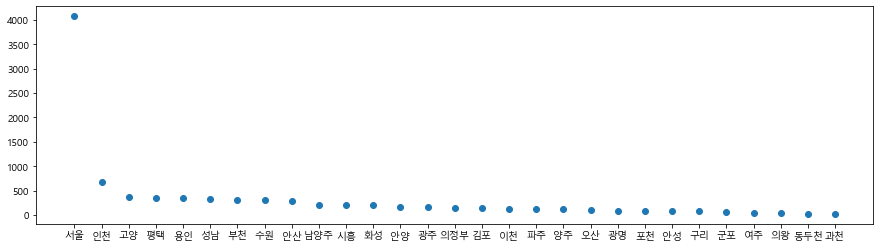

In [254]:
## 강한 비 기준

strong_rain = df_no_rain_drop[df_no_rain_drop["1시간최다강수량(mm)"]>=7.6]
strong_rain
### 강한 비가 내리는 날 사고건수

acc_list = {}

for i in list(strong_rain["지점명"].unique()):
    acc_list[i] = strong_rain[strong_rain["지점명"]==i]["사고건수"].sum()
    
acc_list = pd.Series(acc_list)
acc_list = acc_list.sort_values(ascending=False)

plt.figure(figsize=(15, 4))
plt.scatter(acc_list.index ,acc_list.values)

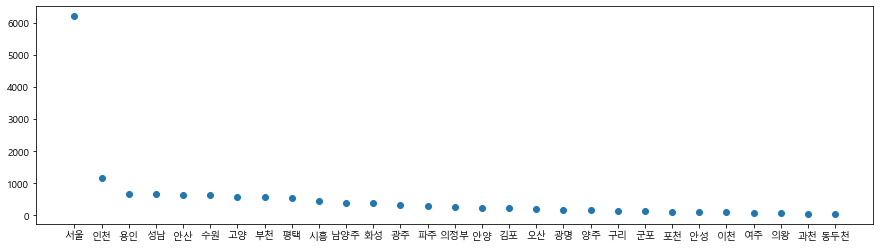

In [255]:
## 보통 비 기준

normal_rain = df_no_rain_drop[df_no_rain_drop["1시간최다강수량(mm)"] >= 2.5]
normal_rain = normal_rain[normal_rain["1시간최다강수량(mm)"]<7.6]
normal_rain
### 보통 비가 내리는 날 사고건수

acc_list = {}

for i in list(normal_rain["지점명"].unique()):
    acc_list[i] = normal_rain[normal_rain["지점명"]==i]["사고건수"].sum()
    
acc_list = pd.Series(acc_list) 
acc_list = acc_list.sort_values(ascending=False)

plt.figure(figsize=(15, 4))
plt.scatter(acc_list.index ,acc_list.values)

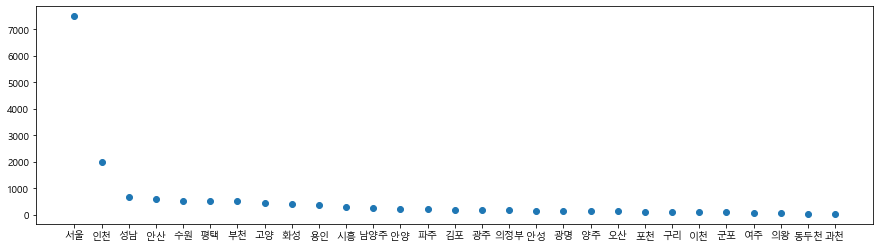

In [256]:
## 약한 비 기준

weak_rain = df_no_rain_drop[df_no_rain_drop["1시간최다강수량(mm)"] < 2.5]
weak_rain = weak_rain[weak_rain["1시간최다강수량(mm)"]>0.5]
weak_rain
### 약한 비가 내리는 날 사고건수

acc_list = {}

for i in list(weak_rain["지점명"].unique()):
    acc_list[i] = weak_rain[weak_rain["지점명"]==i]["사고건수"].sum()
    
acc_list = pd.Series(acc_list) 
acc_list = acc_list.sort_values(ascending=False)

plt.figure(figsize=(15, 4))
plt.scatter(acc_list.index ,acc_list.values)

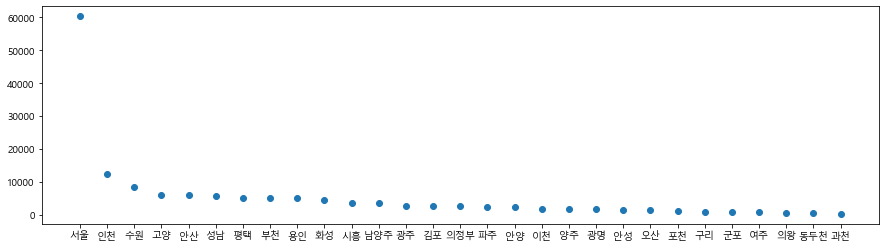

In [260]:
## 비가 안온 날 기준

no_rain = df[df["1시간최다강수량(mm)"] < 0.5]
no_rain
### 약한 비가 내리는 날 사고건수

acc_list = {}

for i in list(no_rain["지점명"].unique()):
    acc_list[i] = no_rain[no_rain["지점명"]==i]["사고건수"].sum()
    
acc_list = pd.Series(acc_list) 
acc_list = acc_list.sort_values(ascending=False)

plt.figure(figsize=(15, 4))
plt.scatter(acc_list.index ,acc_list.values)

In [266]:
print("모든 지역의 강한비가 온 날 : ",len(strong_rain.index))
print("모든 지역의 보통비가 온 날 : ",len(normal_rain.index))
print("모든 지역의 약한비가 온 날 : ",len(weak_rain.index))
print("모든 지역의 약한비가 온 날 : ",len(no_rain.index))

print("-"*70)

print("강한 비가 온 날 일어난 하루 평균 사고 수: ", strong_rain["사고건수"].sum() / len(strong_rain.index))
print("보통 비가 온 날 일어난 하루 평균 사고 수: ", normal_rain["사고건수"].sum() / len(normal_rain.index))
print("약한 비가 온 날 일어난 하루 평균 사고 수: ", weak_rain["사고건수"].sum() / len(weak_rain.index))
print("비가 안 온 날 일어난 하루 평균 사고 수: ", no_rain["사고건수"].sum() / len(no_rain.index))

모든 지역의 강한비가 온 날 :  892
모든 지역의 보통비가 온 날 :  1597
모든 지역의 약한비가 온 날 :  1397
모든 지역의 약한비가 온 날 :  16528
----------------------------------------------------------------------
강한 비가 온 날 일어난 하루 평균 사고 수:  10.431614349775785
보통 비가 온 날 일어난 하루 평균 사고 수:  9.777708202880401
약한 비가 온 날 일어난 하루 평균 사고 수:  11.523264137437366
비가 안 온 날 일어난 하루 평균 사고 수:  9.315343659244919


In [274]:
for i in list(strong_rain["지점명"].unique()):
    print(i,":",strong_rain[strong_rain["지점명"]==i]["사고건수"].sum())

서울 : 4073
고양 : 373
과천 : 23
광명 : 90
광주 : 154
구리 : 80
군포 : 63
김포 : 144
남양주 : 212
동두천 : 30
부천 : 316
성남 : 337
수원 : 301
시흥 : 208
안산 : 280
안성 : 86
안양 : 158
양주 : 120
여주 : 50
오산 : 96
용인 : 350
의왕 : 41
의정부 : 147
이천 : 129
파주 : 124
평택 : 350
포천 : 90
화성 : 204
인천 : 676


In [276]:
traffic_data["노면상태"].unique()

array(['젖음/습기', '건조', '기타', '서리/결빙', '적설', '해빙', '침수'], dtype=object)

In [283]:
traffic_data

,발생일,발생시간,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구,사고유형_대분류,사고유형_중분류,...,노면상태,기상상태,가해당사자종별,가해자성별,가해자연령,가해자신체상해정도,피해당사자종별,피해자성별,피해자연령,피해자신체상해정도
0,2014-01-01,00시,0,0,1,0,서울,종로구,차대차,측면충돌,...,젖음/습기,흐림,승합차,남,48세,기타불명,승용차,남,65세,상해없음
1,2014-01-01,00시,0,0,1,0,서울,강북구,차대사람,횡단중,...,건조,맑음,불명,기타불명,불명,기타불명,보행자,남,60세,경상
2,2014-01-01,00시,0,1,0,0,서울,강동구,차대사람,횡단중,...,건조,맑음,승용차,남,38세,상해없음,보행자,남,59세,중상
3,2014-01-01,00시,0,0,2,0,서울,구로구,차대차,추돌,...,건조,맑음,승용차,남,25세,상해없음,승용차,남,41세,경상
4,2014-01-01,00시,0,0,0,2,서울,구로구,차대차,기타,...,건조,맑음,승용차,남,31세,상해없음,승용차,남,65세,부상신고
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550786,2019-12-31,23시,0,0,0,2,서울,강남구,차량단독,기타,...,건조,맑음,승용차,남,59세,상해없음,없음,없음,없음,없음
550787,2019-12-31,23시,0,0,1,0,서울,강남구,차대차,측면충돌,...,건조,맑음,승용차,남,50세,상해없음,승용차,남,53세,경상
550788,2019-12-31,23시,0,1,0,0,경기,평택시,차대차,측면충돌,...,건조,맑음,승용차,여,46세,상해없음,이륜차,남,31세,중상
550789,2019-12-31,23시,0,0,1,0,경기,과천시,차대차,측면충돌,...,건조,맑음,승용차,남,33세,상해없음,승합차,남,44세,경상


In [282]:
traffic_data

array(['평택시', '이천시', '용인시', '양평군', '고양시', '안산시', '성남시', '의정부시', '부천시',
       '안양시', '안성시', '김포시', '수원시', '의왕시', '남양주시', '하남시', '포천시', '광주시',
       '화성시', '구리시', '군포시', '파주시', '광명시', '여주시', '시흥시', '가평군', '양주시',
       '오산시', '연천군', '과천시', '동두천시'], dtype=object)

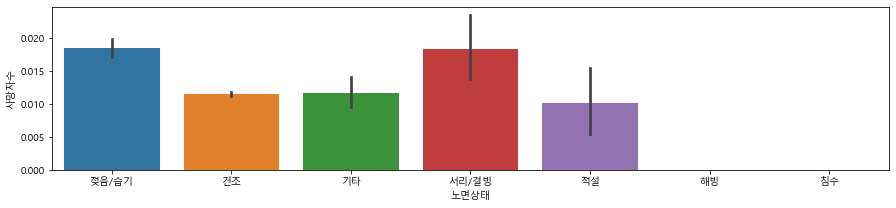

In [284]:
plt.figure(figsize=(15, 3))
sns.barplot(data=traffic_data, x="노면상태", y="사망자수")

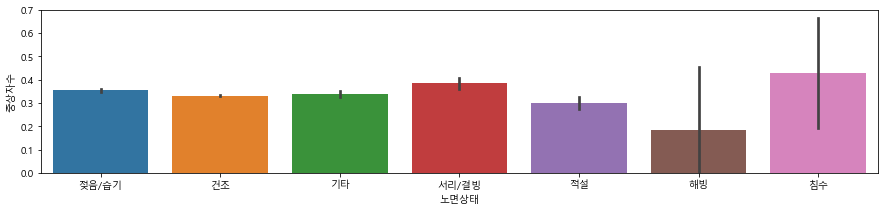

In [285]:
plt.figure(figsize=(15, 3))
sns.barplot(data=traffic_data, x="노면상태", y="중상자수")

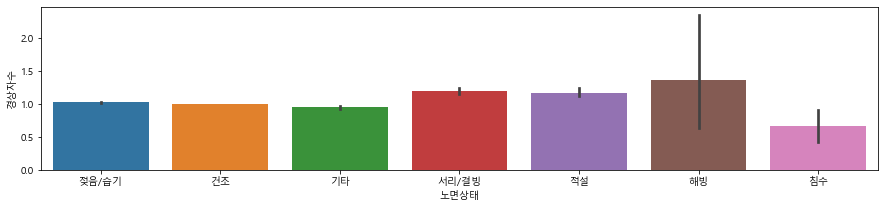

In [286]:
plt.figure(figsize=(15, 3))
sns.barplot(data=traffic_data, x="노면상태", y="경상자수")

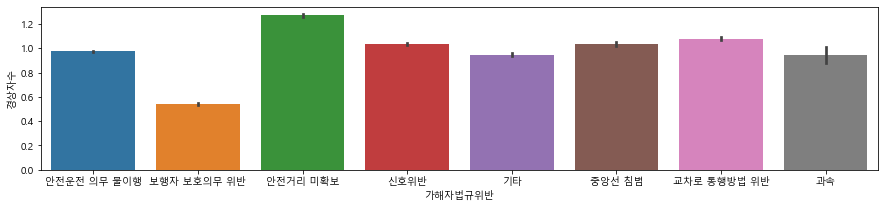

In [287]:
plt.figure(figsize=(15, 3))
sns.barplot(data=traffic_data, x="가해자법규위반", y="경상자수")

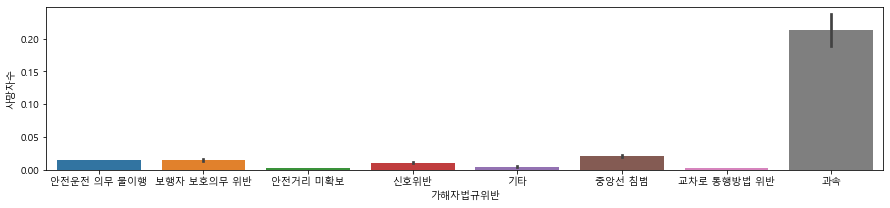

In [288]:
plt.figure(figsize=(15, 3))
sns.barplot(data=traffic_data, x="가해자법규위반", y="사망자수")

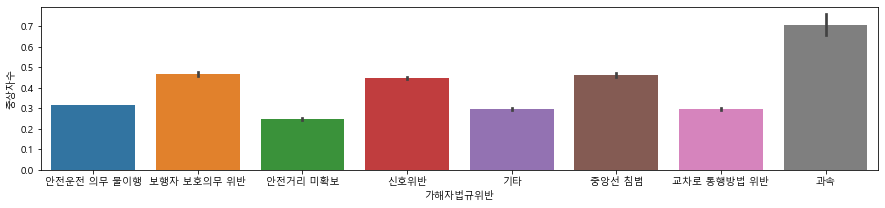

In [289]:
plt.figure(figsize=(15, 3))
sns.barplot(data=traffic_data, x="가해자법규위반", y="중상자수")

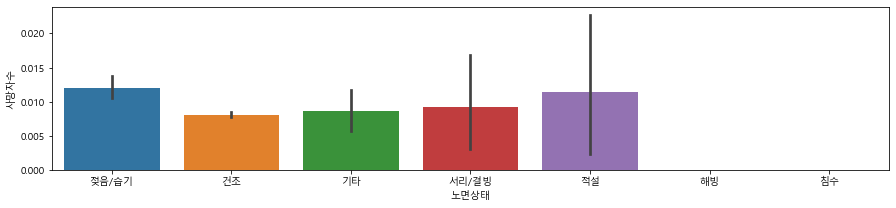

In [302]:
plt.figure(figsize=(15, 3))
sns.barplot(data=traffic_data[traffic_data["발생지_시도"]=="서울"], x="노면상태", y="사망자수")

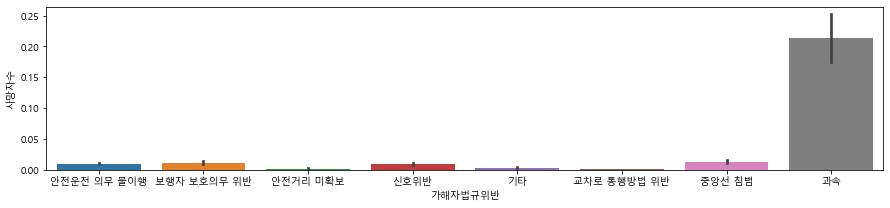

In [303]:
plt.figure(figsize=(15, 3))
sns.barplot(data=traffic_data[traffic_data["발생지_시도"]=="서울"], x="가해자법규위반", y="사망자수")

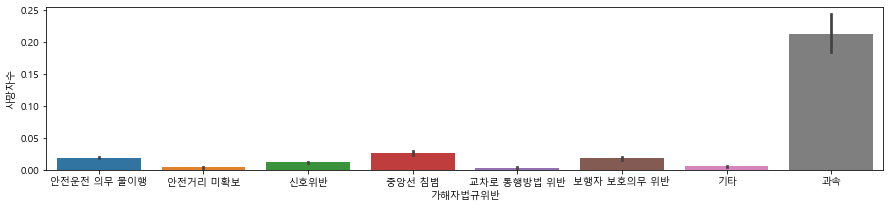

In [304]:
plt.figure(figsize=(15, 3))
sns.barplot(data=traffic_data[traffic_data["발생지_시도"]=="경기"], x="가해자법규위반", y="사망자수")

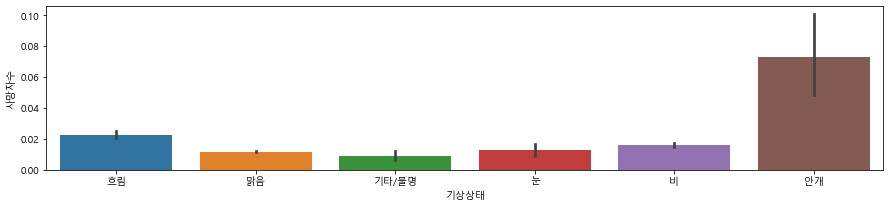

In [305]:
plt.figure(figsize=(15, 3))
sns.barplot(data=traffic_data, x="기상상태", y="사망자수")